In [1]:
pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
pip install datasets --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [3]:
pip install datasets

In [4]:
pip install huggingface_hub --upgrade

In [5]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.9 MB/s eta 0:00:00


In [6]:
import torch
from transformers import GPTJForCausalLM, AutoTokenizer
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import AdamW

In [7]:
torch.cuda.empty_cache()

In [8]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [9]:
# Load the dataset
dataset = load_dataset("databricks/databricks-dolly-15k")

# Print information about the dataset
print(dataset)

# Inspect the structure of the dataset, e.g., columns and splits
print("Splits in the dataset:", dataset.keys())
print("Columns in the train split:", dataset['train'].column_names)


Generating train split:   0%|          | 0/15011 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['instruction', 'context', 'response', 'category'],
        num_rows: 15011
    })
})
Splits in the dataset: dict_keys(['train'])
Columns in the train split: ['instruction', 'context', 'response', 'category']


In [10]:
print(dataset['train'][0])  # Show an example entry from the training set

{'instruction': 'When did Virgin Australia start operating?', 'context': "Virgin Australia, the trading name of Virgin Australia Airlines Pty Ltd, is an Australian-based airline. It is the largest airline by fleet size to use the Virgin brand. It commenced services on 31 August 2000 as Virgin Blue, with two aircraft on a single route. It suddenly found itself as a major airline in Australia's domestic market after the collapse of Ansett Australia in September 2001. The airline has since grown to directly serve 32 cities in Australia, from hubs in Brisbane, Melbourne and Sydney.", 'response': 'Virgin Australia commenced services on 31 August 2000 as Virgin Blue, with two aircraft on a single route.', 'category': 'closed_qa'}


In [11]:
# Check the dataset splits
print("Dataset Splits:", dataset.keys())

# View the first few examples from the train split
print("Sample Data from the Train Split:")
print(dataset['train'][:5])


Dataset Splits: dict_keys(['train'])
Sample Data from the Train Split:
{'instruction': ['When did Virgin Australia start operating?', 'Which is a species of fish? Tope or Rope', 'Why can camels survive for long without water?', "Alice's parents have three daughters: Amy, Jessy, and what’s the name of the third daughter?", 'When was Tomoaki Komorida born?'], 'context': ["Virgin Australia, the trading name of Virgin Australia Airlines Pty Ltd, is an Australian-based airline. It is the largest airline by fleet size to use the Virgin brand. It commenced services on 31 August 2000 as Virgin Blue, with two aircraft on a single route. It suddenly found itself as a major airline in Australia's domestic market after the collapse of Ansett Australia in September 2001. The airline has since grown to directly serve 32 cities in Australia, from hubs in Brisbane, Melbourne and Sydney.", '', '', '', 'Komorida was born in Kumamoto Prefecture on July 10, 1981. After graduating from high school, he join

In [12]:
# Split the training data to create new validation and test sets
train_testvalid = dataset['train'].train_test_split(test_size=0.2)  # Reserve 20% of the data for testing and validation
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)  # Split the reserved 20% equally into test and validation sets

# Assign these splits to variables
train_dataset = train_testvalid['train']  # Remaining 80% for training
valid_dataset = test_valid['test']        # 10% of the original dataset for validation
test_dataset = test_valid['train']        # 10% of the original dataset for testing

# Print the sizes of each split to confirm
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(valid_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 12008
Validation set size: 1502
Test set size: 1501


In [13]:
# Inspect a sample from each split
print("Sample from training set:", train_dataset[0])
print("Sample from validation set:", valid_dataset[0])
print("Sample from test set:", test_dataset[0])


Sample from training set: {'instruction': 'Given a reference text about Wagyu, tell me the different types of cattle that are together known as wagyu.', 'context': 'Wagyu \n\nCattle were brought to Japan from China at the same time as the cultivation of rice, in about the second century AD, in the Yayoi period.:\u200a209\u200a Until about the time of the Meiji Restoration in 1868, they were used only as draught animals, in agriculture, forestry, mining and for transport, and as a source of fertilizer. Milk consumption was unknown, and – for cultural and religious reasons – meat was not eaten. Cattle were highly prized and valuable, too expensive for a poor farmer to buy.:\u200a2\u200a\n\nJapan was effectively isolated from the rest of the world from 1635 until 1854; there was no possibility of the intromission of foreign genes to the cattle population during this time. Between 1868, the year of the Meiji Restoration, and 1887, some 2600 foreign cattle were imported.:\u200a7\u200a At fi

In [14]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilgpt2')

In [14]:
# First, check if the tokenizer has an EOS token, and whether it's set as the pad token
print("EOS Token:", tokenizer.eos_token)
print("Current Pad Token:", tokenizer.pad_token)

# If the pad token is None, set it explicitly to the EOS token or add a new one
if tokenizer.pad_token is None:
    if tokenizer.eos_token is not None:
        tokenizer.pad_token = tokenizer.eos_token
    else:
        # If there is no EOS token, add a new pad token
        tokenizer.add_special_tokens({'pad_token': '[PAD]'})
        # You must resize the token embeddings when you add new tokens
        model.resize_token_embeddings(len(tokenizer))


EOS Token: <|endoftext|>
Current Pad Token: None


In [15]:
# Tokenize function
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples['context'], truncation=True, padding="max_length", max_length=512)
    tokenized_labels = tokenizer(examples['response'], truncation=True, padding="max_length", max_length=512)
    return {'input_ids': tokenized_inputs['input_ids'],
            'attention_mask': tokenized_inputs['attention_mask'],
            'labels': tokenized_labels['input_ids']}


# Apply tokenization to each split
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_valid = valid_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/12008 [00:00<?, ? examples/s]

Map:   0%|          | 0/1502 [00:00<?, ? examples/s]

Map:   0%|          | 0/1501 [00:00<?, ? examples/s]

In [16]:
from torch.utils.data import DataLoader

# Define a function to collate data samples into batches
def collate_fn(batch):
    input_ids = torch.stack([torch.tensor(item['input_ids'], dtype=torch.long) for item in batch])
    attention_mask = torch.stack([torch.tensor(item['attention_mask'], dtype=torch.long) for item in batch])
    labels = torch.stack([torch.tensor(item['labels'], dtype=torch.long) for item in batch])

    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}


# Create the DataLoader for each split
train_loader = DataLoader(tokenized_train, batch_size=16, shuffle=True, collate_fn=collate_fn, num_workers=2)
valid_loader = DataLoader(tokenized_valid, batch_size=16, shuffle=False, collate_fn=collate_fn, num_workers=2)
test_loader = DataLoader(tokenized_test, batch_size=16, shuffle=False, collate_fn=collate_fn, num_workers=2)


In [17]:
first_batch = next(iter(train_loader))
print(first_batch)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


{'input_ids': tensor([[50256, 50256, 50256,  ..., 50256, 50256, 50256],
        [32378, 33958,   746,  ..., 50256, 50256, 50256],
        [50256, 50256, 50256,  ..., 50256, 50256, 50256],
        ...,
        [50256, 50256, 50256,  ..., 50256, 50256, 50256],
        [50256, 50256, 50256,  ..., 50256, 50256, 50256],
        [50256, 50256, 50256,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'labels': tensor([[  818,  2958,  5704,  ..., 50256, 50256, 50256],
        [23581, 23832,   784,  ..., 50256, 50256, 50256],
        [   16,    13,  5896,  ..., 50256, 50256, 50256],
        ...,
        [20191,  2669, 50256,  ..., 50256, 50256, 50256],
        [ 2504,   561,   307,  ..., 50256, 50256, 50256],
        [   50, 11601,   318,  ..., 50256, 50256, 50256]])}


In [18]:
#training on gpu
import torch
from torch.optim import AdamW

# Check if CUDA is available and select device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Clear unused memory and attempt to move model to GPU if sufficient memory is available
if device.type == 'cuda':
    torch.cuda.empty_cache()  # Clear unused memory
    total_memory = torch.cuda.get_device_properties(0).total_memory
    reserved_memory = torch.cuda.memory_reserved(0)
    free_memory = total_memory - reserved_memory
    required_memory = 256 * 1024 * 1024  # Example: Assume model needs 256MB

    print(f"Total GPU memory: {total_memory}, Reserved memory: {reserved_memory}, Free memory: {free_memory}, Required memory: {required_memory}")

    if free_memory >= required_memory:
        model = model.to(device)
        print("Model moved to GPU.")
    else:
        print("Not enough GPU memory. Running on CPU instead.")
        device = torch.device("cpu")
        model = model.to(device)
else:
    model = model.to(device)
    print("Using CPU.")

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)


Total GPU memory: 42481811456, Reserved memory: 0, Free memory: 42481811456, Required memory: 268435456
Model moved to GPU.


In [19]:
#training on gpu
from tqdm import tqdm  # for nice progress bars

# Define the number of epochs
epochs = 5

# Training loop
model.train()  # set the model to training mode
for epoch in range(epochs):
    total_loss = 0
    for batch in tqdm(train_loader):  # iterate over batches
        # Move batch data to the device
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss  # model outputs are always tuple in transformers (see doc)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    print(f'Epoch {epoch+1}/{epochs}, Average Loss: {total_loss / len(train_loader)}')


100%|██████████| 751/751 [04:04<00:00,  3.07it/s]


Epoch 1/5, Average Loss: 1.4530222737360572


100%|██████████| 751/751 [04:03<00:00,  3.09it/s]


Epoch 2/5, Average Loss: 1.3482471221137777


100%|██████████| 751/751 [04:03<00:00,  3.09it/s]


Epoch 3/5, Average Loss: 1.3398051657149699


100%|██████████| 751/751 [04:02<00:00,  3.09it/s]


Epoch 4/5, Average Loss: 1.3230756177962542


100%|██████████| 751/751 [04:03<00:00,  3.09it/s]

Epoch 5/5, Average Loss: 1.3200001051914836


In [20]:
pip install torchsummary

In [21]:
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


In [ ]:
# #Save the Model
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

In [ ]:
# # Specify the path in your Google Drive
# save_path = '/content/drive/MyDrive/Comp646/Project/distilgpt2'

# # Save the model and tokenizer
# model.save_pretrained(save_path)
# tokenizer.save_pretrained(save_path)

In [ ]:
# #keep on cpu, very slow
# import torch
# from transformers import AdamW

# # Explicitly set the device to CPU
# device = torch.device("cpu")

# # Ensure the model is on the CPU
# model = model.to(device)

# # Set up the optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)


In [ ]:
# #training on cpu, very slow
# from tqdm import tqdm


# # Training loop
# model.train()  # set the model to training mode
# epochs = 5
# for epoch in range(epochs):
#     total_loss = 0
#     for batch in tqdm(train_loader):  # iterate over batches
#         inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
#         labels = batch['labels'].to(device)  # Ensure labels are properly referenced

#         # Forward pass
#         outputs = model(**inputs, labels=labels)
#         loss = outputs.loss

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     # Print average loss for the epoch
#     print(f'Epoch {epoch+1}/{epochs}, Average Loss: {total_loss / len(train_loader)}')


In [22]:
# Validation loop
model.eval()  # set the model to evaluation mode
total_eval_loss = 0
with torch.no_grad():  # no gradient is needed for validation
    for batch in valid_loader:
        # Move batch data to the GPU
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss

        total_eval_loss += loss.item()

    # Print average validation loss
    print(f'Validation Loss: {total_eval_loss / len(valid_loader)}')


Validation Loss: 1.377540406394512


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer

# # Specify the path where the model and tokenizer were saved
# save_path = "/content/drive/MyDrive/Comp646/Project/distilgpt2"

# # Load the model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(save_path)
# tokenizer = AutoTokenizer.from_pretrained(save_path)

100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 1/10, Training Loss: 1.30024709468199, Validation Loss: 1.3988833668384146, Test Loss: 1.2587465440973322


100%|██████████| 751/751 [04:03<00:00,  3.09it/s]


Epoch 2/10, Training Loss: 1.2923926952755087, Validation Loss: 1.3988729639256254, Test Loss: 1.2615739956815193


100%|██████████| 751/751 [04:03<00:00,  3.09it/s]


Epoch 3/10, Training Loss: 1.311448169095856, Validation Loss: 1.4285725202966244, Test Loss: 1.2987066716589826


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 4/10, Training Loss: 1.3396749197246232, Validation Loss: 1.401948389854837, Test Loss: 1.275755598824075


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 5/10, Training Loss: 1.468808619144277, Validation Loss: 1.4544619315482201, Test Loss: 1.3290678592438394


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 6/10, Training Loss: 1.4166738116312598, Validation Loss: 1.4675662695093359, Test Loss: 1.344508876191809


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 7/10, Training Loss: 1.413780079938759, Validation Loss: 1.421842704428003, Test Loss: 1.2969755828380585


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 8/10, Training Loss: 1.3839858619573113, Validation Loss: 1.4121897505952956, Test Loss: 1.2933380825722471


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 9/10, Training Loss: 1.4066909579398947, Validation Loss: 1.5192860314186583, Test Loss: 1.4000538834866056


100%|██████████| 751/751 [04:03<00:00,  3.08it/s]


Epoch 10/10, Training Loss: 1.4529600966865626, Validation Loss: 1.4457790534547035, Test Loss: 1.3228865608255913


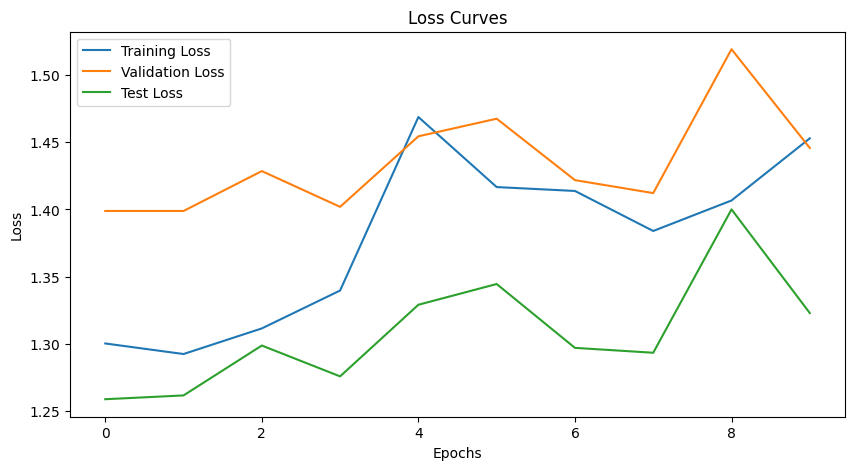

In [23]:
import matplotlib.pyplot as plt

def evaluate(model, loader, device):
    model.eval()  # set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # deactivate autograd
        for batch in loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs, labels=labels)
            total_loss += outputs.loss.item()
    return total_loss / len(loader)

# Lists to store loss values
train_losses = []
valid_losses = []
test_losses = []
epochs = 10
# Training loop
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in tqdm(train_loader):
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # Calculate average losses
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    avg_valid_loss = evaluate(model, valid_loader, device)
    valid_losses.append(avg_valid_loss)

    avg_test_loss = evaluate(model, test_loader, device)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss}, Validation Loss: {avg_valid_loss}, Test Loss: {avg_test_loss}')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
from transformers import TextGenerationPipeline

# Assume the model and tokenizer are loaded and configured
generator = TextGenerationPipeline(
    model=model,
    tokenizer=tokenizer,
    device=-1 if not torch.cuda.is_available() else 0,  # Device configuration
    truncation=True,  # Enable truncation to the maximum length
    max_length=1500,  # Set the maximum length for generated sequences
    do_sample=True,  # Enable sampling to generate diverse responses
    num_return_sequences=1  # Generate one sequence per input
)

# Example: Generate responses based on the 'context' from test data
for example in test_dataset.shuffle().select(range(10)):  # Shuffle and select 10 examples for evaluation
    prompt = example['context']
    generated_responses = generator(prompt)  # Pass the raw text directly

    print(f"Context: {prompt}")
    print(f"Generated Response: {generated_responses[0]['generated_text']}")
    print(f"Actual Response: {example['response']}")
    print("-----")


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='le

Context: 
Generated Response: 
Actual Response: There are several ways to reduce an individual's carbon footprint. It can be done by reducing your utilization of motor vehicles powered by fossil fuels like diesel or gasoline, including cars, airplanes, boats, trains and trucks. It is also possible to reduce your carbon footprint by easy changes in your lifestyle such as adjusting your thermostat so that you don't heat your house too hot in the winter or too cold in the summer, reducing your red meat intake and sourcing your electricity from renewable energy providers. It is also possible to reduce your carbon footprint by improving your home's energy efficiency by using energy efficient appliances, windows, water heaters and HVAC systems.
-----
Context: Earth is the third planet from the Sun and the only place known in the universe where life has originated and found habitability. While Earth may not contain the largest volumes of water in the Solar System, only Earth sustains liquid s

In [25]:
# Evaluate using your chosen metric, e.g., perplexity
model.eval()
total_loss = 0
with torch.no_grad():
    for batch in test_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

# Calculate perplexity based on total loss
perplexity = torch.exp(torch.tensor(total_loss / len(test_loader)))
print(f"Perplexity: {perplexity}")



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Perplexity: 3.7542426586151123
